## Computational Physics - Exam 2023


#### 1 a)

Model of sedimentation of a system of particles of different masses

In [1]:
#Import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

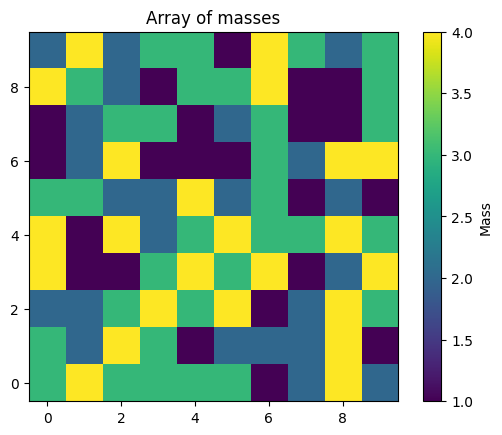

In [2]:
Npart = 100
L = 10

#Random masses between 1 and 4
masses = rng.integers(1, 5, (10, 10))

masses2 = np.copy(masses)
masses3 = np.copy(masses)

#Plotting the masses
plt.imshow(masses, origin='lower', interpolation='none')
plt.title("Array of masses")

plt.colorbar(label="Mass")

####-----ADD xlabel and ylabel

#### b)

GPE = mass * y

In [3]:
def update(masses):
    """Performs a Monte Carlo update, swapping only if the energy goes down
    
    Inputs:
    masses: 2D numpy array of masses
    
    Returns:
    masses: updated array of masses depending on swap or no swap
    GPE_diff: difference in GPE (positive value)
    """
    #Select 2 random particles
    randIntx1 = rng.integers(0, masses.shape[0])
    randInty1 = rng.integers(0, masses.shape[1])
    
    randIntx2 = rng.integers(0, masses.shape[0])
    randInty2 = rng.integers(0, masses.shape[1])
    
    
    #Calculate energies
    GPE_current = masses[randInty1, randIntx1] * randInty1 + masses[randInty2, randIntx2] * randInty2
    GPE_swap = masses[randInty2, randIntx2] * randInty1 + masses[randInty1, randIntx1] * randInty2
    
    #Check if energy goes down
    if GPE_swap < GPE_current:
        #Calcute energy difference
        GPE_diff = GPE_current - GPE_swap
        #Swap masses
        masses[randInty1, randIntx1], masses[randInty2, randIntx2] = masses[randInty2, randIntx2], masses[randInty1, randIntx1]
        
        return masses, GPE_diff
    else:
        GPE_diff = 0
        return masses, GPE_diff


#### c)

In [4]:
Nsteps = 5000

Etot = np.zeros(Nsteps)

#Initial energy calculation
yPos = np.arange(0, L, 1)
Einit = np.sum(yPos * masses)
Etot[0] = Einit

print(f"Initial energy: {Einit}")

#Running the simulation
for i in range(1, Nsteps):
    masses, GPE_diff = update(masses)
    
    Etot[i] = Etot[i-1] - GPE_diff

Initial energy: 1145


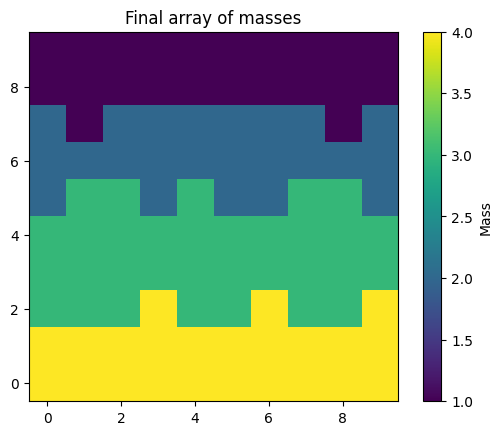

In [5]:
#Plotting final positions
plt.imshow(masses, origin='lower', interpolation='none')
plt.title("Final array of masses")

plt.colorbar(label="Mass")

####-----ADD xlabel and ylabel

#### d)
Plotting energy against time

Text(0, 0.5, 'Energy')

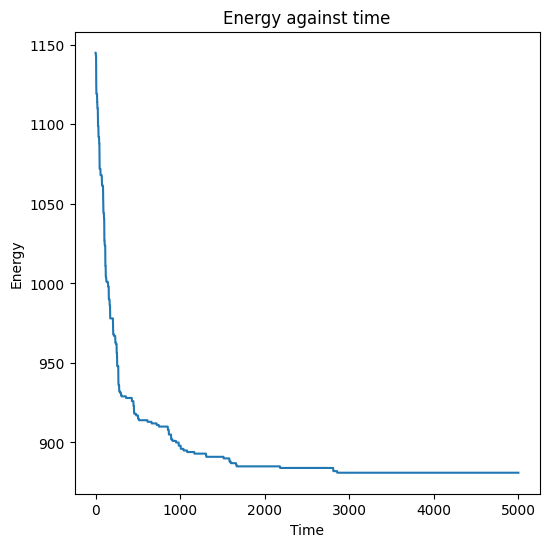

In [6]:
plt.figure(figsize=(6, 6))

t_arr = np.arange(0, Nsteps, 1)
plt.plot(t_arr, Etot)

plt.title("Energy against time")
plt.xlabel("Time")
plt.ylabel("Energy")

#### Converged energy calculation

From looking at the graph the energy seems to converge after around 4000 terms, so taking an average of the results from 4000 to the end should give us a correct average converged energy.

In [7]:
E_converged = np.mean(Etot[:-1000]) 

print(f"The converged value of the energy is: {E_converged}")

The converged value of the energy is: 899.29525


Physically, the particles with higher masses are being moved down in the box to have lower GPE and particles with higher masses are being swapped to move to higher in the box to have a larger GPE. This process lowers the total energy within the box to be at or near a minimum using the Monte Carlo method.

#### e)

In [8]:
def update_metropolis(masses, beta):
    """ Performs a Monte Carlo update based on the Metropolis algorithm
    
    Inputs:
    masses: 2D numpy array of masses
    beta: constant
    
    Returns:
    masses: updated array of masses depending on swap or no swap
    GPE_diff: difference in GPE
    """
    #Select 2 random particles
    randIntx1 = rng.integers(0, masses.shape[0])
    randInty1 = rng.integers(0, masses.shape[1])
    
    randIntx2 = rng.integers(0, masses.shape[0])
    randInty2 = rng.integers(0, masses.shape[1])
    
    randE = rng.random()
    
    
    #Calculate energies
    GPE_current = masses[randInty1, randIntx1] * randInty1 + masses[randInty2, randIntx2] * randInty2
    GPE_swap = masses[randInty2, randIntx2] * randInty1 + masses[randInty1, randIntx1] * randInty2
    
    GPE_diff = (GPE_swap - GPE_current)
    
    #Check if energy goes down or meets metropolis requirement
    if GPE_swap < GPE_current:
        #Swap masses
        masses[randInty1, randIntx1], masses[randInty2, randIntx2] = masses[randInty2, randIntx2], masses[randInty1, randIntx1]
        return masses, GPE_diff
    
    elif randE < np.exp(-(GPE_diff/beta)):
        #Swap masses
        masses[randInty1, randIntx1], masses[randInty2, randIntx2] = masses[randInty2, randIntx2], masses[randInty1, randIntx1]
        return masses, GPE_diff
    
    else:
        GPE_diff = 0
        return masses, GPE_diff


#### f)
beta = 1

Initial energy for beta = 1: 1145
The converged value of the energy for beta = 1 is: 1122.0994444444445


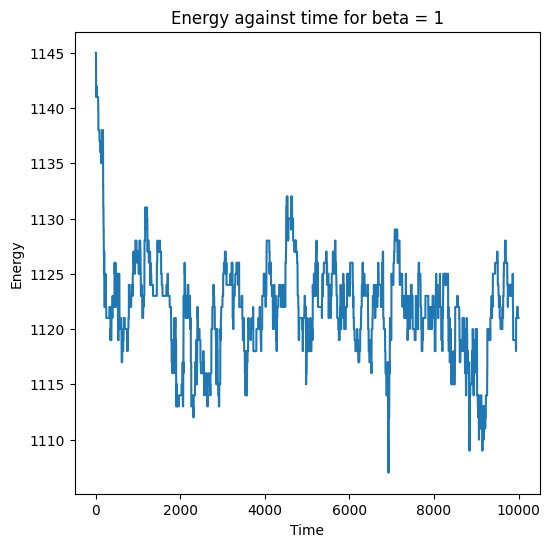

In [9]:
Nsteps = 10000
beta = 1

Etot = np.zeros(Nsteps)

#Initial energy calculation
yPos = np.arange(0, L, 1)
Einit = np.sum(yPos * masses2)
Etot[0] = Einit

print(f"Initial energy for beta = 1: {Einit}")

#Running the simulation
for i in range(1, Nsteps):
    masses, GPE_diff = update_metropolis(masses, beta)
    
    Etot[i] = Etot[i-1] - GPE_diff


#Plotting energy against time
plt.figure(figsize=(6, 6))

t_arr = np.arange(0, Nsteps, 1)
plt.plot(t_arr, Etot)

plt.title("Energy against time for beta = 1")
plt.xlabel("Time")
plt.ylabel("Energy")

#Calculating converged energy
E_converged = np.mean(Etot[:-1000]) 

print(f"The converged value of the energy for beta = 1 is: {E_converged}")

#### f) 
beta = 2

Initial energy for beta = 1: 1145
The converged value of the energy for beta = 2 is: 1107.672111111111


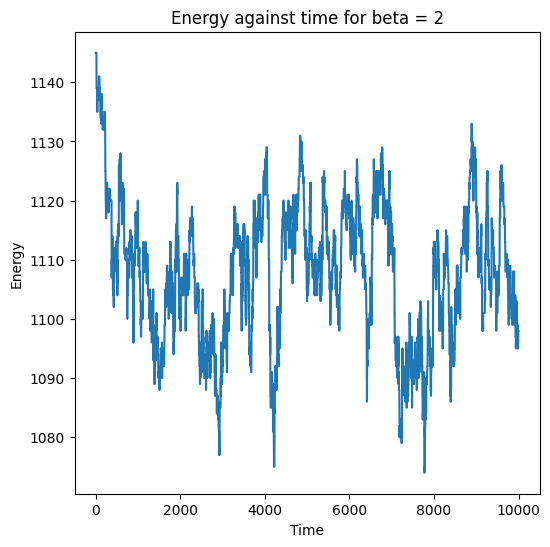

In [10]:
Nsteps = 10000
beta = 2

Etot = np.zeros(Nsteps)

#Initial energy calculation
yPos = np.arange(0, L, 1)
Einit = np.sum(yPos * masses2)
Etot[0] = Einit

print(f"Initial energy for beta = 1: {Einit}")

#Running the simulation
for i in range(1, Nsteps):
    masses, GPE_diff = update_metropolis(masses, beta)
    
    Etot[i] = Etot[i-1] - GPE_diff


#Plotting energy against time
plt.figure(figsize=(6, 6))

t_arr = np.arange(0, Nsteps, 1)
plt.plot(t_arr, Etot)

plt.title("Energy against time for beta = 2")
plt.xlabel("Time")
plt.ylabel("Energy")

#Calculating converged energy
E_converged = np.mean(Etot[:-1000]) 

print(f"The converged value of the energy for beta = 2 is: {E_converged}")

# 2) Poisson equation

#### a)

In [11]:
def single_update_jacobi(phi, h):
    """Update NxN grid of phi using Jacobi method 
    Inputs:
    phi: NxN array
    h: grid spacing
    Returns:
    rhoout: updated rho array"""

    phiout = np.copy(phi)
    
    N = phi.shape[0]
    M = phi.shape[1]
    for i in range(1,N-1):
        for j in range(1,M-1):
            phiout[i,j] = 0.25*(phi[i-1,j] + phi[i+1,j] 
                              + phi[i,j-1] + phi[i,j+1])
            
    return phiout

#### b)

Text(0, 0.5, 'y')

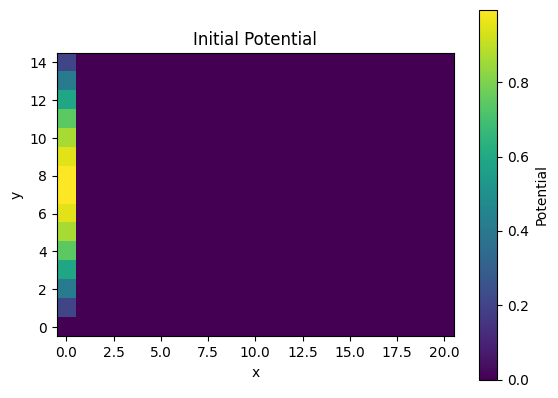

In [12]:
a = 21
b = 15

rho = np.zeros((b, a)) #charge density
phi = np.zeros((b, a)) #potential

yArr = np.arange(0, a, 1)
xArr = np.arange(0, b, 1)

#Initial conditions
phi[0] = 0
phi[b-1] = 0
phi[:, 0] = np.sin((np.pi * xArr)/b)
phi[:, a-1] = 0

plt.imshow(phi, origin='lower', interpolation='none')

plt.colorbar(label="Potential")
plt.title("Initial Potential")
plt.xlabel("x")
plt.ylabel("y")


#### c) Grid spacing of 1

In [13]:
#Run jacobi till residual less than 0.001

residual = 10 #Large value to enter loop

residual_list = []

while residual >= 0.001:
    phi_out = single_update_jacobi(phi, 1)
    residual = np.sum(np.linalg.norm(phi_out - phi))
    phi = phi_out
    residual_list.append(residual)


Text(0.5, 1.0, 'Graph of Potential at specific y values against x')

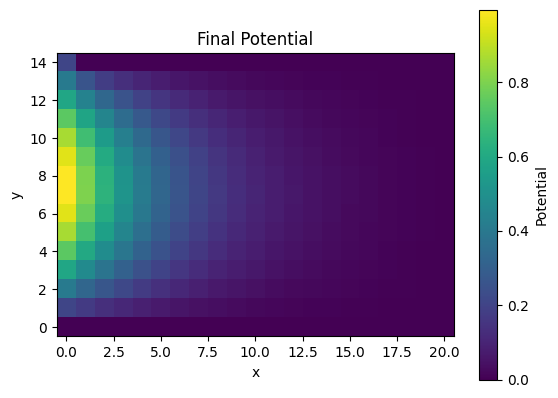

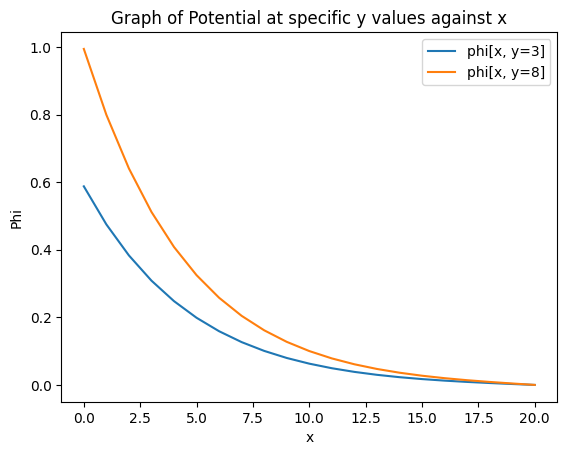

In [14]:
#Potential graph
plt.imshow(phi, origin='lower', interpolation='none')

plt.colorbar(label="Potential")
plt.title("Final Potential")
plt.xlabel("x")
plt.ylabel("y")


plt.figure()
#phi against x
plt.plot(yArr, phi[3, :], label="phi[x, y=3]")
plt.plot(yArr, phi[8, :], label="phi[x, y=8]")

plt.legend()
plt.xlabel("x")
plt.ylabel("Phi")
plt.title("Graph of Potential at specific y values against x")


This looks like an exponential decay, which is expected given that further away from the boundary conditions, the potential will be less strong

#### e)